In [1]:
import sys
import rootpath
sys.path.append(rootpath.detect())

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pymoo.factory import get_performance_indicator
from testsuite.utilities import dominates

In [3]:
def image_case(case):
    fig = plt.figure(figsize=[6,6])
    ax = fig.gca()
    ax.scatter(*case['p'].T, c="C0", label="p")
    ax.scatter(*case['target'].T, c="magenta", label="target")
    ax.scatter(*case['ref_point'], c="C2", label="reference")
    try:
        ax.set_title(f" a expected: {case['doh'][0]} computed: {volume(case)[0]} \n b expected: {case['doh'][1]} computed: {volume(case)[1]}")
    except TypeError: 
        ax.set_title(f"{case['doh']}")
    ax.grid('on')
    ax.axis("scaled")
    ax.set_xticks(range(0,12)) 
    ax.set_yticks(range(0,12)) 
    ax.legend(loc="lower left")
    return fig

In [4]:
# target attained
case_00 = {'ref_point': np.array([10., 10.]),
          'target' : np.array([[6., 7.]]),
          'p' : np.array([[1., 7.],
                          [3., 6.],
                          [5., 5.],
                          [7., 4.]]),
          'doh': (12., 4.)
          }

# target unattained
case_01 = {'ref_point': np.array([10., 10.]),
          'target' : np.array([[2., 4.]]),
          'p' : np.array([[1., 7.],
                          [3., 6.],
                          [5., 5.],
                          [7., 4.]]),
          'doh': (39., 0.)
          }

# target attained, beyond scope
case_02 = {'ref_point': np.array([10., 10.]),
          'target' : np.array([[9., 5.]]),
          'p' : np.array([[1., 7.],
                          [3., 6.],
                          [5., 5.],
                          [7., 4.]]),
          'doh': (5., 2.)
          }

# target unattained, beyond scope
case_03 = {'ref_point': np.array([10., 10.]),
          'target' : np.array([[0., 5.]]),
          'p' : np.array([[1., 7.],
                          [3., 6.],
                          [5., 5.],
                          [7., 4.]]),
          'doh': (39., 0.)
          }

# target edge 
case_04 = {'ref_point': np.array([10., 10.]),
          'target' : np.array([[10., 1.]]),
          'p' : np.array([[1., 7.],
                          [3., 6.],
                          [5., 5.],
                          [7., 4.]]),
          'doh': (0., 0.)
          }

# target edge, target outside ref_point span
case_05 = {'ref_point': np.array([10., 10.]),
          'target' : np.array([[11., 5.]]),
          'p' : np.array([[1., 7.],
                          [3., 6.],
                          [5., 5.],
                          [7., 4.]]),
          'doh': AssertionError
          }

In [5]:

def volume_a(case):
    rp = case['ref_point']
    t = case['target']
    p = case['p']
    p = p[np.argsort(p[:, 0])]
    
    # add points to p at limit of reference point
    pa = np.array([p[0][0], rp[1]]).reshape(1, -1)
    pb = np.array([rp[0], p[-1][1]]).reshape(1, -1)
    p = np.vstack((pa ,p, pb))
    
    # modify p to limit at the edges of the bounding box. 
    t_max = t.max(axis=0)
    p_ = np.vstack([pi if pi[0]>t_max[0] else [t_max[0], pi[1]] for pi in p])
    p_ = np.vstack([pi if pi[1]>t_max[1] else [pi[0], t_max[1]] for pi in p_])
    
    t_attained = not np.any([dominates(t, pi) for pi in p])
    
    if t_attained:
        measure = get_performance_indicator("hv", ref_point = rp)
        hpv =  measure.calc(t)
    else:
        measure = get_performance_indicator("hv", ref_point = rp)
        hpv =  measure.calc(p_)
    return hpv

def volume_b(case):
    rp = case['ref_point']
    t = case['target']
    p = case['p']
    p = p[np.argsort(p[:, 0])]
    
    t_attained = not np.any([dominates(t, pi) for pi in p])
    if t_attained:
        measure = get_performance_indicator("hv", ref_point = t.reshape(-1))
        hpv = measure.calc(p)
    else:
        hpv = 0.
    return hpv

def volume(case):
    return volume_a(case), volume_b(case)


Compiled modules for significant speedup can not be used!
https://pymoo.org/installation.html#installation

To disable this warning:
from pymoo.configuration import Configuration
Configuration.show_compile_hint = False



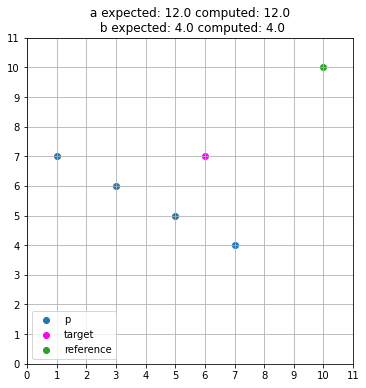

In [6]:
fig = image_case(case_00);

In [35]:
case = case_00
rp = case['ref_point']
t = case['target']
p = case['p']
p = p[np.argsort(p[:, 0])]


measure = get_performance_indicator("hv", ref_point = t.reshape(-1))
hpv = measure.calc(p)

In [124]:
hpv

4.0

In [96]:
fig.gca().scatter(*p_.T, c="C1", s=100, alpha=.4)

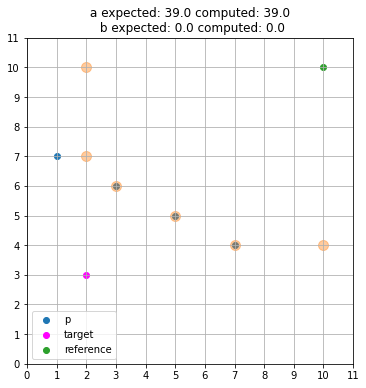

In [97]:
fig

In [44]:
p = np.array([[2.84758662, 0.98198686], [2.86368731, 0.97534034], [1.9261772, 2.53199539], [2.23791945, 1.82458891], [2.00187055, 2.43944965], [1.79583925, 2.60037381], [1.84300283, 2.59873382], [2.78881021, 0.9995919 ], [2.73369401, 1.10747338], [2.48047146, 1.75199805]])

In [46]:
case_te = {'ref_point': np.array([0.354, 3.139]),
          'target' : np.array([[0.354, 3.139]]),
          'p' : p,
          'doh': (0., 0.)
          }